In [2]:
#combine files 
import glob 
import os
#clean 
import string
import pandas as pd
import numpy as np
import emoji
import nltk
import re 
from cleantext import clean
#sleep timer 
import time 
import logging
import threading
#show most common words
from collections import Counter
#word cloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('shopee_expressID.csv')
column_titles = ['rating','caption']
df1 = df.reindex(columns=column_titles)
df1 = df1.dropna()

In [4]:
df1['middle'] = df1['caption'].str.split(")").str[1] 
df1['reviews'] = df1['middle'].str.split("(").str[0]

df1 = df1.reset_index()

In [5]:
df1['reviews'].fillna('0', inplace = True)
for i, row in df1.iterrows(): 
    review = row['reviews']
    if review == '0':
        df1['reviews'][i] = review.replace('0', row['caption'])

/var/folders/5w/0kxl7gbj5vqb93sccvkxwrzc0000gn/T/ipykernel_53148/1854476216.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['reviews'][i] = review.replace('0', row['caption'])


In [19]:
df1.to_csv('IDshopee.csv')

### Run 2nd csv

In [20]:
df2 = pd.read_csv('shopee_expressID2.csv')

In [21]:
column_titles = ['rating','caption']
df2 = df2.reindex(columns=column_titles)

df2['middle'] = df2['caption'].str.split(")").str[1]

df2['reviews'] = df2['middle'].str.split("(").str[0]

In [22]:
df2

,rating,caption,middle,reviews
0,1.0,"Shope expres tai, barang saya bisa ilang gitu ...",NaN,NaN
1,1.0,Ngga ada pergerakan selama sehari padahal udah...,NaN,NaN
2,1.0,"Lama banget di gudang dc bandung, paket saya d...",NaN,NaN
3,1.0,Lilaaaaaaaa barg mau d pake hari ini g sampe2....,NaN,NaN
4,1.0,"Kacaauu ,, kurir nyaa ga amanah",NaN,NaN
...,...,...,...,...
925,1.0,(Translated by Google) Did not receive the pac...,Did not receive the package but the package s...,Did not receive the package but the package s...
926,5.0,"(Translated by Google) good, awesome (Origina...","good, awesome (Original","good, awesome"
927,5.0,(Translated by Google) good (Original) bagus,good (Original,good
928,5.0,"(Translated by Google) reasonable still new, ...","reasonable still new, (Original","reasonable still new,"


In [26]:
df2 = df2.reset_index()

df2['reviews'].fillna('0', inplace = True)
for i, row in df2.iterrows(): 
    review = row['reviews']

    if review == '0':
        df2['reviews'][i] = review.replace('0', str(row['caption']))

/var/folders/5w/0kxl7gbj5vqb93sccvkxwrzc0000gn/T/ipykernel_53148/2329333919.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['reviews'][i] = review.replace('0', str(row['caption']))


In [27]:
df2
df2.to_csv('IDshopee2.csv')

### Combining files together 

In [28]:
files = os.path.join("IDshopee**.csv")
files = glob.glob(files)
df_combi = pd.concat(map(pd.read_csv, files), ignore_index=True)
df_combi.to_csv("combined_shopeeid.csv")

### Clean the data

In [29]:
df_combi = pd.read_csv('combined_shopeeid.csv')

from nltk.corpus import stopwords
stop = stopwords.words('english')

def clean_text_round1(text):
    '''Make text lowercase, remove punctuation, remove words containing numbers and lemmatize/stem.'''
    text = str(text).lower()
    text = re.sub('#\w*', '', text)
    text = re.sub('@\w*', '', text)    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = clean(text, no_emoji=True)
    text = emoji.demojize(text, delimiters=("", "")) #change emoji into text 
    text = ' '.join([word for word in text.split() if word not in (stop)])
    return text

# Let's take a look at the updated text
df_combi['reviews'] = pd.DataFrame(df_combi['reviews'].apply(clean_text_round1))
df_combi

,Unnamed: 0,Unnamed: 0.1,level_0,index,rating,caption,middle,reviews
0,0,0,0.0,0,1.0,"Shope expres tai, barang saya bisa ilang gitu ...",NaN,shope expres tai barang saya bisa ilang gitu g...
1,1,1,1.0,1,1.0,Ngga ada pergerakan selama sehari padahal udah...,NaN,ngga ada pergerakan selama sehari padahal udah...
2,2,2,2.0,2,1.0,"Lama banget di gudang dc bandung, paket saya d...",NaN,lama banget di gudang dc bandung paket saya di...
3,3,3,3.0,3,1.0,Lilaaaaaaaa barg mau d pake hari ini g sampe2....,NaN,lilaaaaaaaa barg mau pake hari ini g boasanya ...
4,4,4,4.0,4,1.0,"Kacaauu ,, kurir nyaa ga amanah",NaN,kacaauu kurir nyaa ga amanah
...,...,...,...,...,...,...,...,...
1110,1110,180,NaN,242,5.0,(Translated by Google) It & amp; # 39; s nice ...,It & amp; # 39; s nice to shop with a free sh...,amp nice shop free shopee shipping tissue ...
1111,1111,181,NaN,243,5.0,(Translated by Google) Shopee ... Shopee ... ...,Shopee ... Shopee ... (Original,shopee shopee
1112,1112,182,NaN,244,5.0,"(Translated by Google) Indeed, the delivery sp...","Indeed, the delivery speed is super fast, the...",indeed delivery speed super fast goods scratch...
1113,1113,183,NaN,245,5.0,"(Translated by Google) Fast delivery, Please s...","Fast delivery, Please select shopee exoress ...",fast delivery please select shopee exoress


### Sentiment analysis 


In [30]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
def clean_text_round2(text):
    word_list = nltk.word_tokenize(text)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output
df_combi['reviews'] = pd.DataFrame(df_combi['reviews'].apply(clean_text_round2))


In [33]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer() 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    if sentiment_dict['compound'] >= 0.05 : 
       return "Positive"
    elif sentiment_dict['compound'] <= - 0.05 : 
        return "Negative"
    else : 
       return "Neutral"
        
df_combi['sentiment'] = pd.DataFrame(df_combi['reviews'].apply(sentiment_scores))

In [34]:
column_titles = ['rating','reviews','sentiment']
df_combi = df_combi.reindex(columns=column_titles)
df_combi.to_csv('ninjavan_ID.csv')

In [35]:
df_neg = df_combi.drop(df_combi[df_combi['sentiment'] != 'Negative'].index)
df_neg

,rating,reviews,sentiment
11,1.0,courier initial confirmation package put carel...,Negative
13,1.0,bad choose minus minus star value choose minus...,Negative
14,1.0,better delete courier expedition shopee shame ...,Negative
15,1.0,worst shipping service expedition archipelago ...,Negative
18,1.0,status received even though item received phot...,Negative
...,...,...,...
1092,1.0,slow send time failed padhal house easy find ...,Negative
1097,1.0,long delivery delivery still within city day f...,Negative
1101,1.0,using shopee xpress condition received packagi...,Negative
1102,1.0,delivery long please repair disappoint cstmers...,Negative


In [36]:
#combining the text into one long string for word cloud 
cloud_string = df_neg['reviews'].str.cat(sep=' ')

In [37]:
# Let's first pull out the top 30 words for each category
words = []
for word in cloud_string.split():
        words.append(word)
Counter(words).most_common()

[('...', 232),
 ('package', 111),
 ('bad', 89),
 ('shopee', 77),
 ('courier', 74),
 ('day', 72),
 ('delivery', 71),
 ('really', 67),
 ('time', 60),
 ('express', 59),
 ('received', 53),
 ('long', 50),
 ('arrived', 49),
 ('service', 48),
 ('even', 48),
 ('bandung', 48),
 ('item', 43),
 ('dont', 43),
 ('expedition', 38),
 ('sent', 37),
 ('though', 36),
 ('didnt', 32),
 ('status', 30),
 ('disappointed', 29),
 ('use', 28),
 ('good', 27),
 ('using', 25),
 ('doesnt', 24),
 ('want', 24),
 ('one', 22),
 ('hasnt', 21),
 ('come', 21),
 ('still', 21),
 ('address', 20),
 ('failed', 20),
 ('arrive', 18),
 ('week', 17),
 ('know', 17),
 ('send', 17),
 ('like', 16),
 ('im', 16),
 ('call', 16),
 ('order', 16),
 ('first', 15),
 ('said', 15),
 ('slow', 15),
 ('stuck', 14),
 ('crazy', 14),
 ('take', 14),
 ('already', 14),
 ('name', 13),
 ('yet', 12),
 ('havent', 12),
 ('number', 12),
 ('star', 11),
 ('night', 11),
 ('also', 11),
 ('hub', 11),
 ('lazy', 10),
 ('tired', 10),
 ('house', 10),
 ('took', 10),
 (

In [38]:
#add meaningless words to stopwords
add_stop_words = ['...' , 'package', 'even', 'use', 'hasnt','doesnt']
stop_words = add_stop_words + stop 

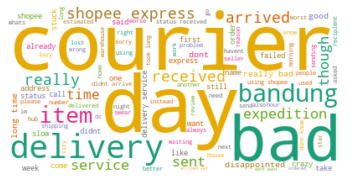

In [39]:
#wordcloud for top 100 words 
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42, max_words = 100)

wordcloud = wc.generate(cloud_string)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

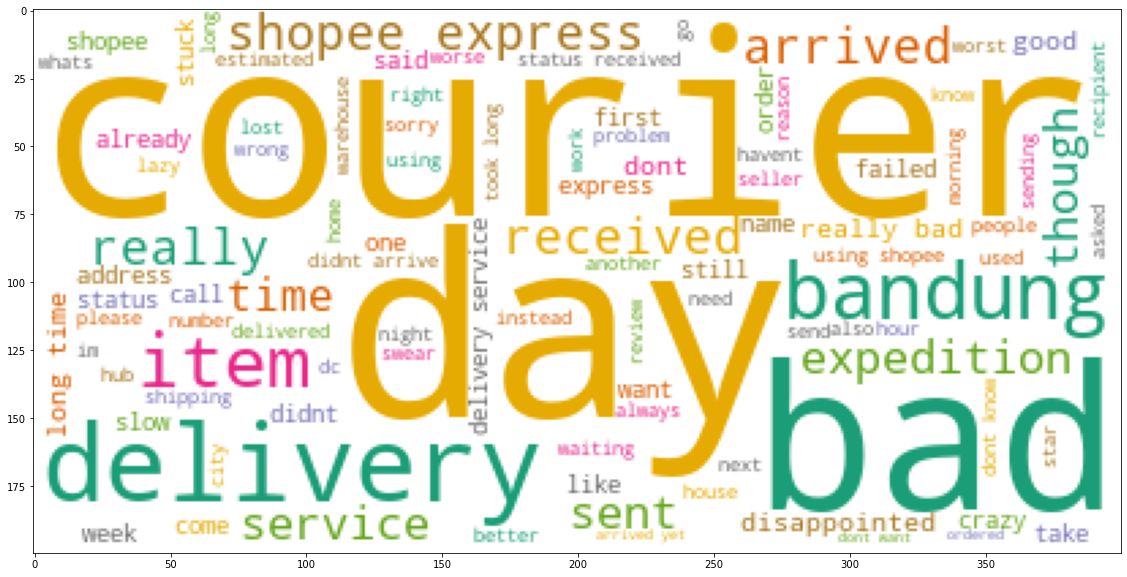

In [40]:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)

In [42]:
late_words = ['slow', 'late', 'long']
df_late = df_neg[df_neg['reviews'].str.contains('|'.join(late_words))]
df_late = df_late.rename(columns ={'reviews':'Late reviews'})

In [43]:
df_late

,rating,Late reviews,sentiment
19,1.0,im really lazy shopee express forget dont repl...,Negative
26,1.0,long time stored long time sent address tired ...,Negative
27,1.0,long stupid courier,Negative
50,5.0,review negative huh ive using shopee express l...,Negative
53,1.0,wow package bandung makassar sent yet keep lon...,Negative
...,...,...,...
1064,1.0,courier doesnt want contact customer bondo coo...,Negative
1092,1.0,slow send time failed padhal house easy find ...,Negative
1097,1.0,long delivery delivery still within city day f...,Negative
1102,1.0,delivery long please repair disappoint cstmers...,Negative


In [44]:
df_late.to_csv('Late_reviews_shopeeID.csv')